## Часть 1
Напишите скрипт, который скачивает  сообщения с Телеграм-канала https://t.me/Sputnik_results . Сохраните сообщения в формате по вашему выбору (.csv, .jsonl, sqlite, parquet, и т.д.). Откройте с помощью Pandas или Arrow, постройте график числа сообщений в зависимости от даты. 

### Часть 2
1.Напишите функции для извлечения данных из сообщений:
   - пол участника
   - возраст участника

   Постройте диаграммы для визуализации. 

2.Реализуйте какой-либо анализ этих данных на ваше усмотрение. Например их можно кластеризовать и интерпретировать кластеры, или попробовать выделить статистику по среднему количеству антител в зависимости от возраста, или посчитать количество заболевших после вакцинации. Обязательная визуализация. 

In [2]:
import pandas as pd
import re
import numpy as np


In [ ]:
df = pd.read_csv('/content/messages.csv', encoding='utf-8')

In [ ]:
df.head(10)

,Date,Messages
0,2021-11-17 15:28:29+00:00,@duggarrik неделю читает правила чата.
1,2021-11-17 15:11:57+00:00,обсуждения в чате @sputnik_is_starting. Здесь ...
2,2021-11-17 15:10:55+00:00,"Добрый день, я поставила прививку 03.11 а 10.1..."
3,2021-11-17 15:07:12+00:00,"#ревак Спутником-V 16 ноября в 15:00, сразу же..."
4,2021-11-17 15:00:03+00:00,**Народные отчеты о вакцинации\r\n\r\n**⚠️ **Т...
5,2021-11-17 14:14:12+00:00,V2 15.11.21 поставили вторую дозу также вместе...
6,2021-11-17 12:30:03+00:00,📣 **ВЕСТНИК V1V2** выпуск #40.x от 08.11.2021@...
7,2021-11-17 12:15:33+00:00,"Ж. 26, не болела. реактивный артрит в стадии р..."
8,2021-11-17 12:03:57+00:00,"#ревак\r\nЖ44, без хронич, не болела. \r\n04.0..."
9,2021-11-17 11:03:30+00:00,"Ж.53. не болела. гипотериоз,АИТ, гипертония. \..."


In [ ]:
df['Male'] = None
df['Female'] = None
df['Age'] = None
df.head()

,Date,Messages,Male,Female,Age
0,2021-11-17 15:28:29+00:00,@duggarrik неделю читает правила чата.,None,None,None
1,2021-11-17 15:11:57+00:00,обсуждения в чате @sputnik_is_starting. Здесь ...,None,None,None
2,2021-11-17 15:10:55+00:00,"Добрый день, я поставила прививку 03.11 а 10.1...",None,None,None
3,2021-11-17 15:07:12+00:00,"#ревак Спутником-V 16 ноября в 15:00, сразу же...",None,None,None
4,2021-11-17 15:00:03+00:00,**Народные отчеты о вакцинации\r\n\r\n**⚠️ **Т...,None,None,None


In [ ]:
pattern=re.compile(r'([MМЖ])(.{0,2})(\d\d)')
for i in range(df.shape[0]):
    pat = pattern.search(str(df['Messages'][i]))
    if pat != None:
        if pat.group(1) == 'M' or pat.group(1) == 'М':
            df['Male'][i] = 1
            df['Female'][i] = 0
        else:
            df['Male'][i] = 0
            df['Female'][i] = 1
        df['Age'][i] = str(pat.group(3))
df.head(20)

,Date,Messages,Male,Female,Age
0,2021-11-17 15:28:29+00:00,@duggarrik неделю читает правила чата.,None,None,None
1,2021-11-17 15:11:57+00:00,обсуждения в чате @sputnik_is_starting. Здесь ...,None,None,None
2,2021-11-17 15:10:55+00:00,"Добрый день, я поставила прививку 03.11 а 10.1...",None,None,None
3,2021-11-17 15:07:12+00:00,"#ревак Спутником-V 16 ноября в 15:00, сразу же...",None,None,None
4,2021-11-17 15:00:03+00:00,**Народные отчеты о вакцинации\r\n\r\n**⚠️ **Т...,None,None,None
5,2021-11-17 14:14:12+00:00,V2 15.11.21 поставили вторую дозу также вместе...,1,0,27
6,2021-11-17 12:30:03+00:00,📣 **ВЕСТНИК V1V2** выпуск #40.x от 08.11.2021@...,None,None,None
7,2021-11-17 12:15:33+00:00,"Ж. 26, не болела. реактивный артрит в стадии р...",0,1,26
8,2021-11-17 12:03:57+00:00,"#ревак\r\nЖ44, без хронич, не болела. \r\n04.0...",0,1,44
9,2021-11-17 11:03:30+00:00,"Ж.53. не болела. гипотериоз,АИТ, гипертония. \...",0,1,53


In [12]:
pattern=re.compile(r'([MМЖ])(.{0,2})(\d\d)')
pat = pattern.search(str('#ревак М43'))
print(pat.group(1))

М


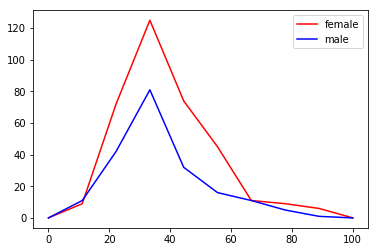

In [ ]:
#количество мужчин/женщин по возрастам
%matplotlib inlin

import matplotlib.pyplot as plt

A = np.zeros((2,10))
for i in range (df.shape[0]):
    if df['Male'][i] != None:
        A[df['Male'][i]][int(df['Age'][i])//10] +=1
        
x = np.linspace(0, 100, 10)

plt.plot(x, A[0], color = 'r', label = 'female')
plt.plot(x, A[1], color = 'b', label = 'male')
plt.legend()
plt.show()

In [ ]:
df["Sputnik_V"] = None
df['Sputnik_light'] = None

pattern_V = re.compile(r'(V)(.?)([12])')
pattern_light = re.compile(r'([Сс])(путник)(.{0,3})([Лл])(айт)')

for i in range (df.shape[0]):
    pt_V = pattern_V.search(str(df['Messages'][i]))
    pt_l = pattern_light.search(str(df['Messages'][i]))
    if pt_V != None:
        df['Sputnik_V'][i] = 1
        df ['Sputnik_light'][i] = 0
    elif pt_l != None:
        df['Sputnik_V'][i] = 0
        df ['Sputnik_light'][i] = 1
df.head(10)

,Date,Messages,Male,Female,Age,Sputnik_V,Sputnik_light
0,2021-11-17 15:28:29+00:00,@duggarrik неделю читает правила чата.,None,None,None,None,None
1,2021-11-17 15:11:57+00:00,обсуждения в чате @sputnik_is_starting. Здесь ...,None,None,None,None,None
2,2021-11-17 15:10:55+00:00,"Добрый день, я поставила прививку 03.11 а 10.1...",None,None,None,None,None
3,2021-11-17 15:07:12+00:00,"#ревак Спутником-V 16 ноября в 15:00, сразу же...",None,None,None,1,0
4,2021-11-17 15:00:03+00:00,**Народные отчеты о вакцинации\r\n\r\n**⚠️ **Т...,None,None,None,1,0
5,2021-11-17 14:14:12+00:00,V2 15.11.21 поставили вторую дозу также вместе...,1,0,27,1,0
6,2021-11-17 12:30:03+00:00,📣 **ВЕСТНИК V1V2** выпуск #40.x от 08.11.2021@...,None,None,None,1,0
7,2021-11-17 12:15:33+00:00,"Ж. 26, не болела. реактивный артрит в стадии р...",0,1,26,1,0
8,2021-11-17 12:03:57+00:00,"#ревак\r\nЖ44, без хронич, не болела. \r\n04.0...",0,1,44,1,0
9,2021-11-17 11:03:30+00:00,"Ж.53. не болела. гипотериоз,АИТ, гипертония. \...",0,1,53,1,0


In [ ]:
for i in range(df.shape[0]):
    if df['Date'][i].month == 11:
        if df['Sputnik_V'][i] == 1:
            A[df['Date'][i].day] +=1
        elif df['Sputnik_V'][i] == 0:
            B[df['Date'][i].day] +=1
    else:
        break


{1: 84,
 2: 70,
 3: 42,
 4: 98,
 5: 133,
 6: 196,
 7: 98,
 8: 91,
 9: 70,
 10: 63,
 11: 84,
 12: 112,
 13: 161,
 14: 175,
 15: 154,
 16: 91,
 17: 70}

<BarContainer object of 17 artists>

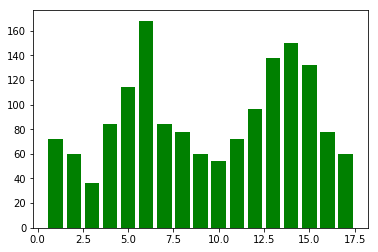

In [ ]:
#упоминания Спутника V за ноябрь (вероятно, привитые этим с)
plt.bar(list(A.keys()), A.values(), color='g')

<BarContainer object of 17 artists>

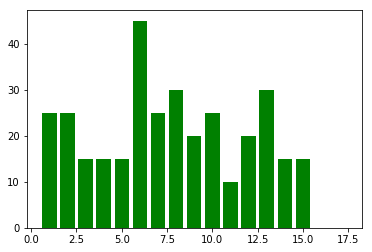

In [ ]:
# Спутник Лайт (кол-во за ноябрь)
plt.bar(list(B.keys()), B.values(), color='g')